# Titanic KNN
## DS 303 Final Project
### Group: Fei-Fei Li
### Evan Mills

In [36]:
# Import libraries
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load in data cleaned in R

In [37]:
train = pd.read_csv("train_clean.csv")
testx = pd.read_csv("test_clean.csv")
testt = pd.read_csv("gender_clean.csv")

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrainSet
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


In [39]:
testx.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrainSet
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,False
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False
3,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,False


In [40]:
testt.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


#### Drop Useless Columns

In [41]:
traint = train['Survived']
trainx = train.drop(['Name', 'Sex', 'Survived', 'Cabin', 'Embarked', 'Ticket', 'IsTrainSet', 'PassengerId'], axis=1)
trainx.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [42]:
traint.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [43]:
testx = testx.drop(['Name', 'Sex', 'Survived', 'Cabin', 'Embarked', 'Ticket', 'IsTrainSet', 'PassengerId'], axis=1)
testx.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875
3,3,27.0,0,0,8.6625
4,3,22.0,1,1,12.2875


In [44]:
testt = testt.drop(['PassengerId'], axis=1)
testt.head()

,Survived
0,0
1,1
2,0
3,0
4,1


#### Model Training and Selection

In [45]:
models = []
best_acc = 0
best_idx = 0
for i in range(1,50):
    model = knn(n_neighbors=i)
    model.fit(trainx, traint)
    pred = model.predict(testx)
    acc = metrics.accuracy_score(testt, pred)
    models.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_k = i

print("The best model has a K = " + str(best_k) + ", and an accuracy of " + str(best_acc))

The best model has a K = 31, and an accuracy of 0.6578947368421053


#### Plot of Accuracy

AttributeError: module 'matplotlib.pyplot' has no attribute 'lengend'

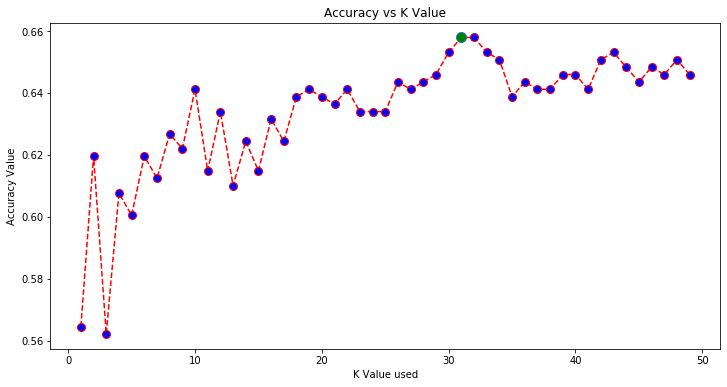

In [60]:
plt.figure(figsize=(12,6))
plt.plot(range(1,50), models, color="red", linestyle='dashed', marker='o', markerfacecolor = "blue", markersize=8)
best, = plt.plot(best_k, best_acc, marker="o", markersize = 10, markerfaceColor = "green")
best.set_label("Best K")
plt.title("Accuracy vs K Value")
plt.xlabel("K Value used")
plt.ylabel("Accuracy Value")
plt.lengend()